# Bank Loan Analysis Project

## Importing Libraries

In [2]:
import pandas as pd
import numpy as pn 
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import plotly.express as px

## Importing Data

In [3]:
df = pd.read_excel("C:/Users/vivid/OneDrive/Desktop/Data Analysis Projects/Python Project/financial_loan.xlsx")

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


## Metadata of Data

In [4]:
print("No of Rows:", df.shape[0]) # for column: shape[1]

No of Rows: 38576


## Data type

In [5]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [6]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


## 1. Total Loan Applications

In [7]:
total_loan_applications = df['id'].count()
print('Total Loan Applications:', total_loan_applications)

Total Loan Applications: 38576


## Month-To-Date Total Loan Applications

In [9]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications for {latest_issue_date.strftime('%B %Y')} :{mtd_loan_applications}")

MTD Loan Applications for December 2021 :4314


## 2. Total Funded Amount

In [10]:
total_funded_amount = df['loan_amount'].sum()
print('Total Funded Amount:', total_funded_amount)

Total Funded Amount 435757075


### Formatting

In [14]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount / 1000000
print('Total Funded Amount: ${:.2f}M'.format(total_funded_amount_millions))

Total Funded Amount: $435.76M


## Month-To-Date Total Funded Amount

In [18]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1000000

print('MTD Total Funded Amount: ${:.2f}M'.format(mtd_total_funded_amount_millions))

MTD Total Funded Amount: $53.98M


## 3. Total Amount Received

In [19]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_amount_received / 1000000
print('Total Amount Received: ${:.2f}M'.format(total_amount_received_millions))

Total Amount Received: $473.07M


## MTD Total Amount Received

In [20]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received / 1000000

print('MTD Total Amount Received: ${:.2f}M'.format(mtd_total_amount_received_millions))

MTD Total Amount Received: $58.07M


## 4. Average Interest Rate

In [21]:
avg_int_rate = df['int_rate'].mean()
print('Average Interest Rate: ',  avg_int_rate)

Average Interest Rate:  0.12048831397760265


### Formatting

In [23]:
avg_int_rate = df['int_rate'].mean() * 100
print('Average Interest Rate: {:.2f}%'.format(avg_int_rate))

Average Interest Rate: 12.05%


## 5. Average Debt-To-Income Ratio

In [24]:
avg_dti_rate = df['dti'].mean()* 100
print('Average DTI Rate: {:.2f}%'.format(avg_dti_rate))

Average DTI Rate: 13.33%


## 6. Good Loan Metrics

In [6]:
good_loans = df[df['loan_status'].isin(['Fully Paid', 'Current'])] # getting good loan values

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_received_millions = good_loan_received / 1000000

good_loan_percentage = (good_loan_applications/total_loan_applications) * 100

print('Good Loan Applications:', good_loan_applications)
print('Good Loan Funded Amount: ${:.2f}M'.format(good_loan_funded_amount_millions))
print('Good Loan Received: ${:.2f}M'.format(good_loan_received_millions))
print('Good Loan Percentage: {:.2f}%'.format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount: $370.22M
Good Loan Received: $435.79M
Good Loan Percentage: 86.18%


## 7. Bad Loan Metrics

In [7]:
bad_loans = df[df['loan_status'].isin(['Charged Off'])] # getting bad loan values

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_yet_to_receive = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_yet_to_receive_millions = bad_loan_yet_to_receive / 1000000

bad_loan_percentage = (bad_loan_applications/total_loan_applications)*100

print('Bad Loan Applications: ', bad_loan_applications)
print('Bad Loan Funded Amount: ${:.2f}M'.format(bad_loan_funded_amount_millions))
print('Bad Loan Yet to Receive: ${:.2f}M'.format(bad_loan_yet_to_receive_millions))
print('Bad Loan Percentage: {:.2f}%'.format(bad_loan_percentage))

Bad Loan Applications:  5333
Bad Loan Funded Amount: $65.53M
Bad Loan Yet to Receive: $37.28M
Bad Loan Percentage: 13.82%


# Charts

## 1. Monthly Trends

### a. Monthly Trends by Issue Date for Total Funded Amount

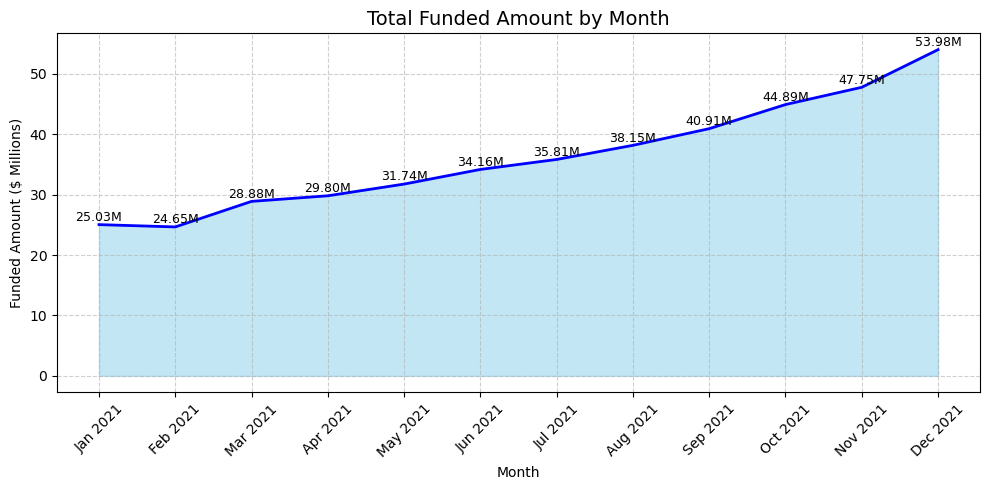

In [21]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x:x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color = 'skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color = 'blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i,row['loan_amount_millions']+0.1, f"{row['loan_amount_millions']:.2f}M",
            ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### b. Monthly Trends by Issue Date for Total Amount Received

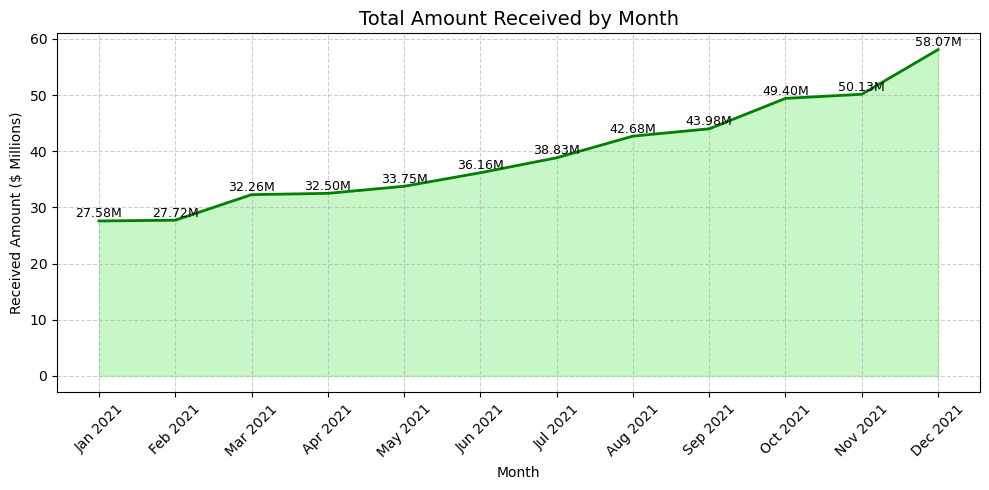

In [22]:
monthly_received = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x:x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index(name='amount_received_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_received['month_name'], monthly_received['amount_received_millions'], color = 'lightgreen', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['amount_received_millions'], color = 'green', linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i,row['amount_received_millions']+0.1, f"{row['amount_received_millions']:.2f}M",
            ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Amount Received by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### c. Monthly Trends by Issue Date for Total Loan Applications

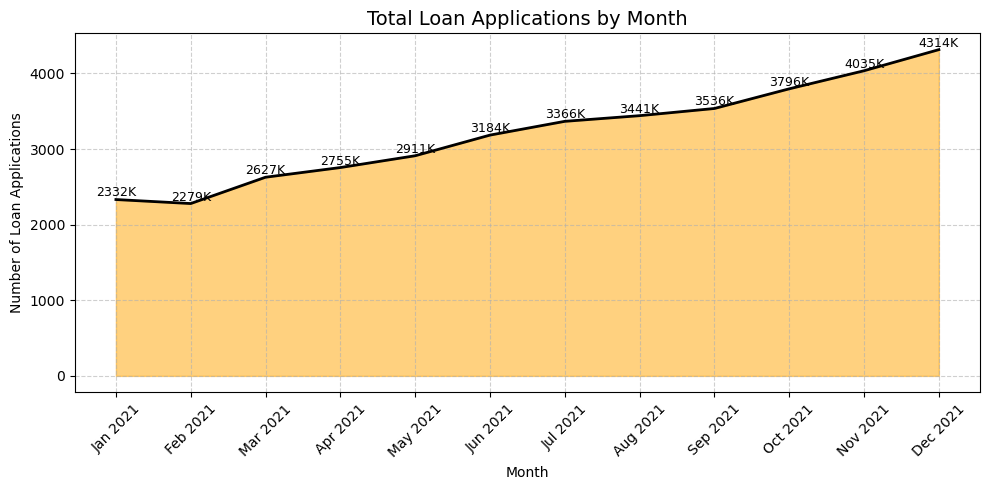

In [23]:
monthly_applications = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x:x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name='loan_applications_count')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['loan_applications_count'], color = 'orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications_count'], color = 'black', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i,row['loan_applications_count']+0.5, f"{row['loan_applications_count']}K",
            ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Loan Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 2. Regional Analysis

### a. Regional Analysis by State for Total Funded Amount

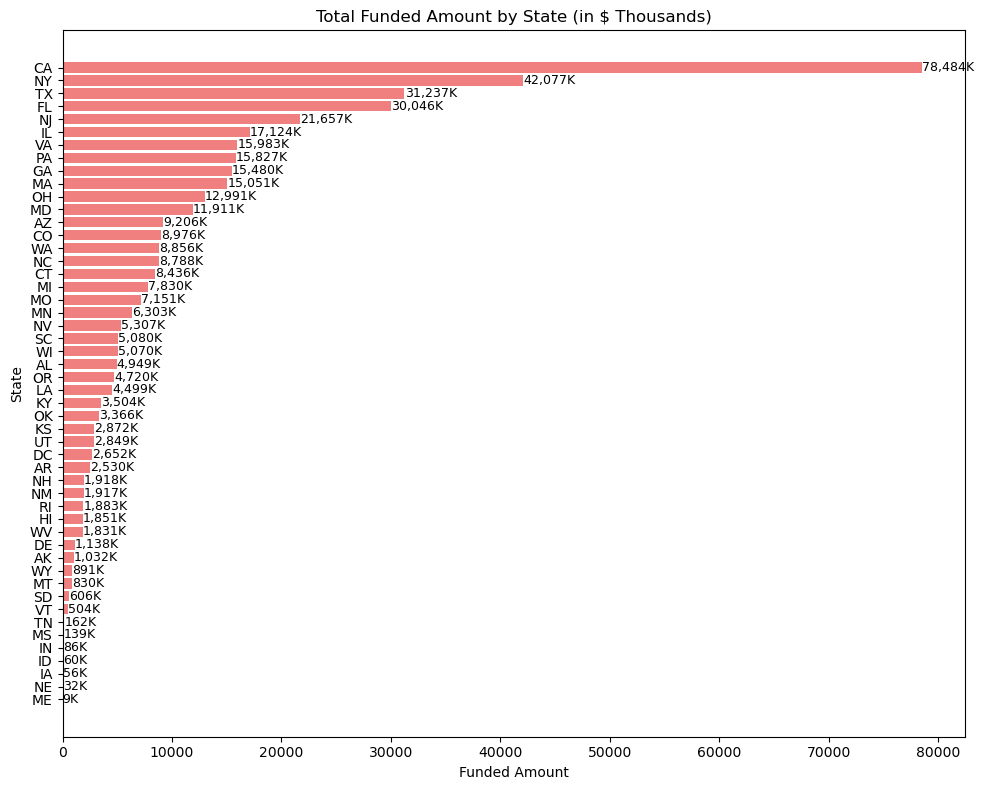

In [27]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State (in $ Thousands)')
plt.xlabel('Funded Amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### b. Regional Analysis by State for Total Amount Received

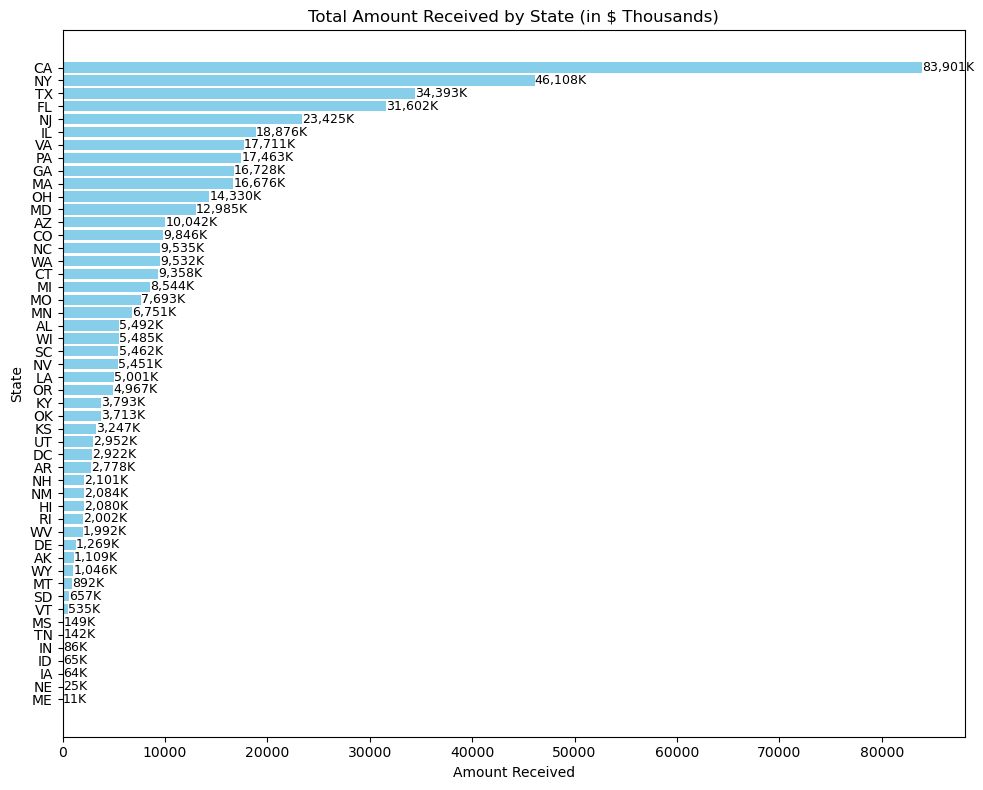

In [35]:
state_amount_received = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_amount_received_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_amount_received_thousands.index, state_amount_received_thousands.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Amount Received by State (in $ Thousands)')
plt.xlabel('Amount Received')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### c. Regional Analysis by State for Total Loan Applications

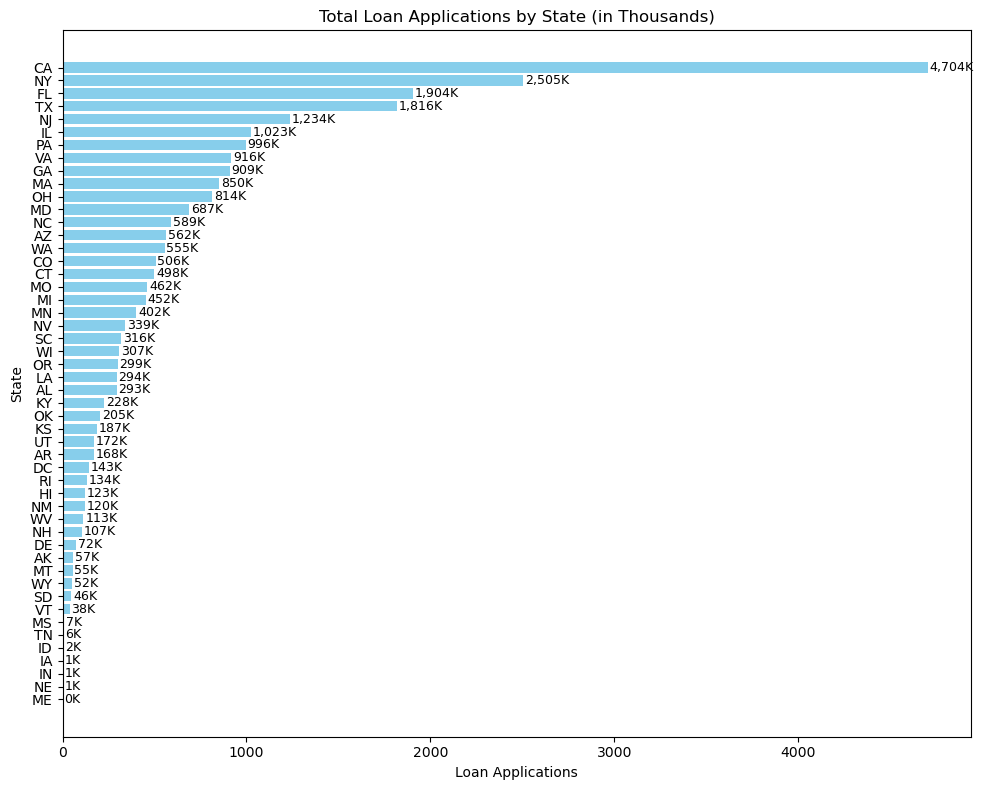

In [6]:
loan_applications = df.groupby('address_state')['id'].sum().sort_values(ascending=True)
loan_applications_thousands = loan_applications/1000000
plt.figure(figsize=(10, 8))
bars = plt.barh(loan_applications_thousands.index, loan_applications_thousands.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Loan Applications by State (in Thousands)')
plt.xlabel('Loan Applications')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## 3. Loan Term Analysis

### c. Loan Term Analysis by Total Funded Amount

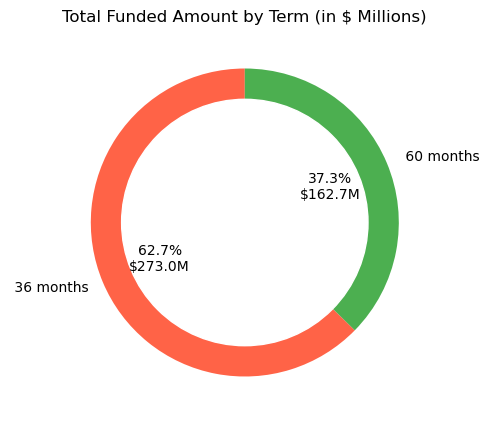

In [95]:
term_funding_millions = df.groupby('term')['loan_amount'].sum()/1000000

colors = ['#FF6347', '#4CAF50', '#FFEB3B', '#2196F3']

plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p:f'{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M',
    startangle=90, wedgeprops={'width':0.4},
    colors=colors
)
plt.gca().add_artist(plt.Circle((0, 0), 0.80, color='white'))
plt.title('Total Funded Amount by Term (in $ Millions)')
plt.show()

### b. Loan Term Analysis by Total Amount Received

<Figure size 500x500 with 0 Axes>

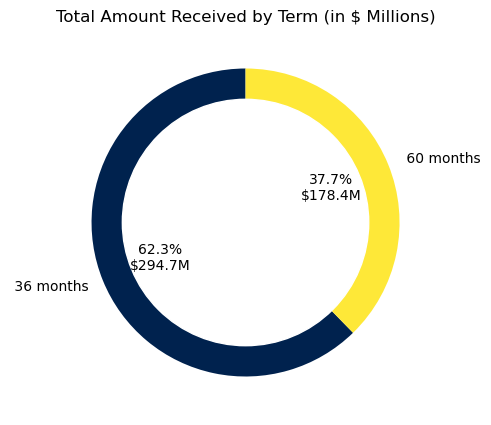

In [93]:
term_funding_millions = df.groupby('term')['total_payment'].sum()/1000000

colors = plt.cm.cividis(pn.linspace(0,1,len(loan_applications_thousands)))
plt.figure(figsize=(5,5))

plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p:f'{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M',
    startangle=90, wedgeprops={'width':0.4},
    colors=colors
)
plt.gca().add_artist(plt.Circle((0, 0), 0.80, color='white'))
plt.title('Total Amount Received by Term (in $ Millions)')
plt.show()

### c. Loan Term Analysis by Total Loan Applications

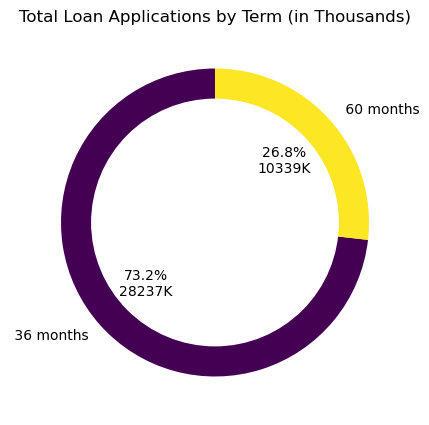

In [91]:
loan_applications_thousands = df.groupby('term')['id'].count()

colors = plt.cm.viridis(pn.linspace(0,1,len(loan_applications_thousands)))
plt.figure(figsize=(5,5))
plt.pie(
    loan_applications_thousands,
    labels=loan_applications_thousands.index,
    autopct=lambda p:f'{p:.1f}%\n{p*sum(loan_applications_thousands)/100:.0f}K',
    startangle=90, wedgeprops={'width':0.4},
    colors=colors
)
plt.gca().add_artist(plt.Circle((0, 0), 0.80, color='white'))
plt.title('Total Loan Applications by Term (in Thousands)')
plt.show()

## 4. Employment Length Analysis

### a. Employment Length Analysis by Total Funded Amount

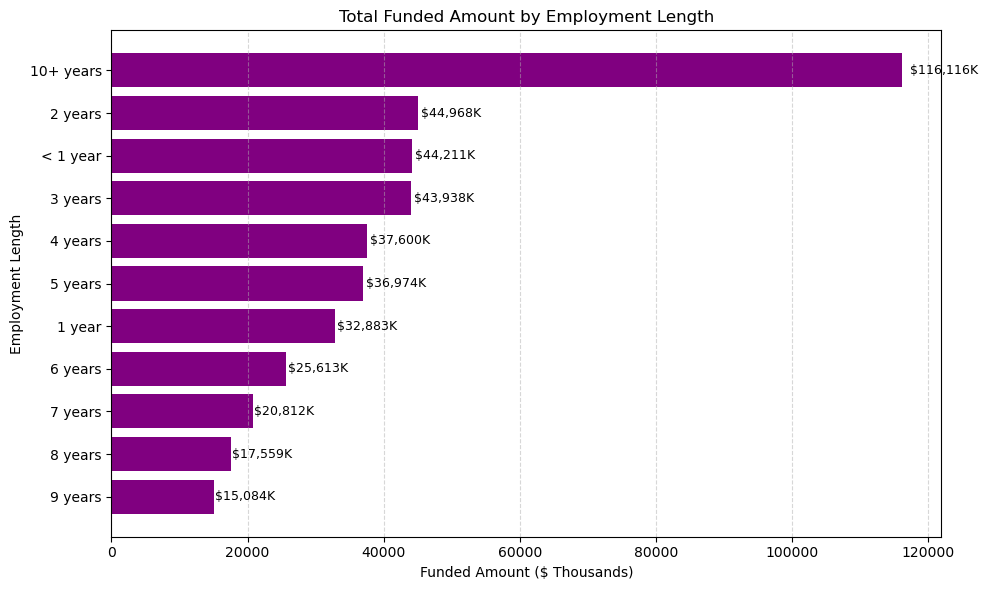

In [66]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_funding.index, emp_funding, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + width * 0.01, bar.get_y()+ bar.get_height()/2,
            f'${width:,.0f}K', va='center', fontsize=9)

plt.xlabel('Funded Amount ($ Thousands)')
plt.ylabel('Employment Length')
plt.title('Total Funded Amount by Employment Length')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### b. Employment Length Analysis by Total Amount Received

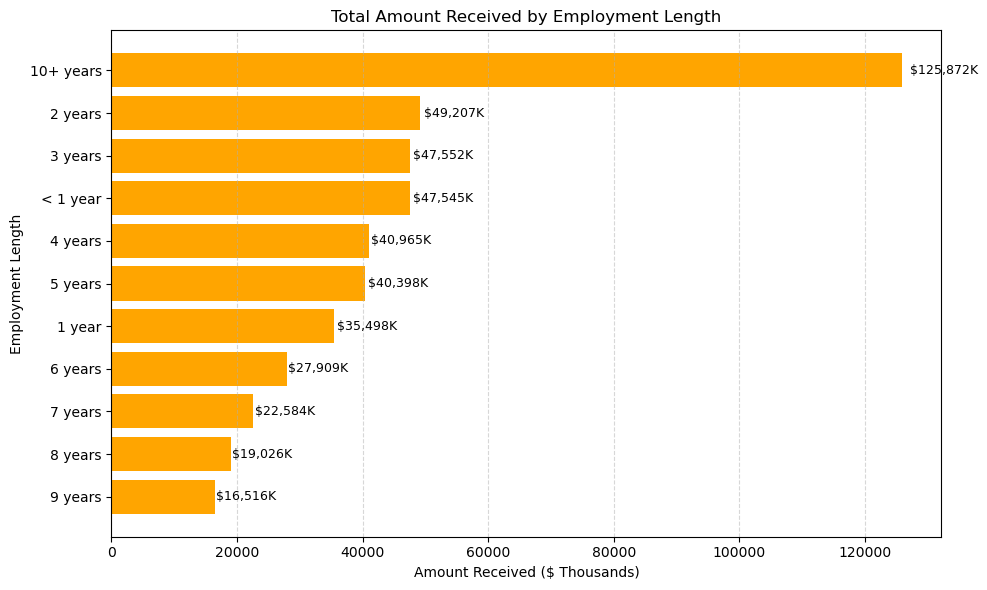

In [64]:
emp_amt_received = df.groupby('emp_length')['total_payment'].sum().sort_values()/1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_amt_received.index, emp_amt_received, color='orange')

for bar in bars:
    width = bar.get_width()
    plt.text(width + width * 0.01, bar.get_y()+ bar.get_height()/2,
            f'${width:,.0f}K', va='center', fontsize=9)

plt.xlabel('Amount Received ($ Thousands)')
plt.ylabel('Employment Length')
plt.title('Total Amount Received by Employment Length')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### c. Employment Length Analysis by Total Loan Applications

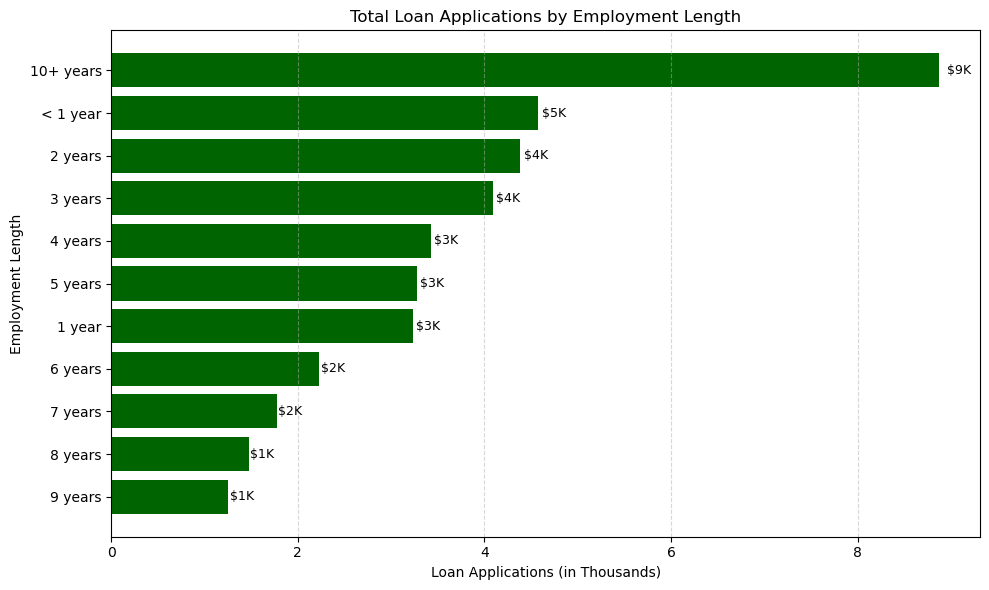

In [67]:
emp_loan_app = df.groupby('emp_length')['id'].count().sort_values()/1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_loan_app.index, emp_loan_app, color='darkgreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + width * 0.01, bar.get_y()+ bar.get_height()/2,
            f'${width:,.0f}K', va='center', fontsize=9)

plt.xlabel('Loan Applications (in Thousands)')
plt.ylabel('Employment Length')
plt.title('Total Loan Applications by Employment Length')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 5. Loan Purpose Analysis

### a. Loan Purpose by Total Funded Amount

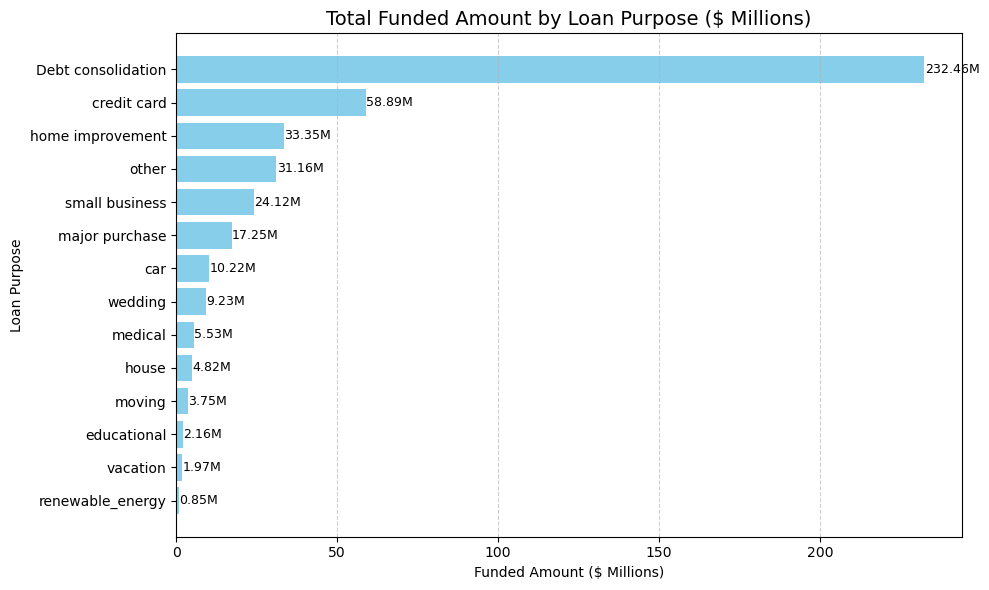

In [68]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000)

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y()+ bar.get_height()/2,
            f'{width:.2f}M', va='center', fontsize=9)

plt.title('Total Funded Amount by Loan Purpose ($ Millions)', fontsize=14)
plt.xlabel('Funded Amount ($ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### b. Loan Purpose by Total Amount Received

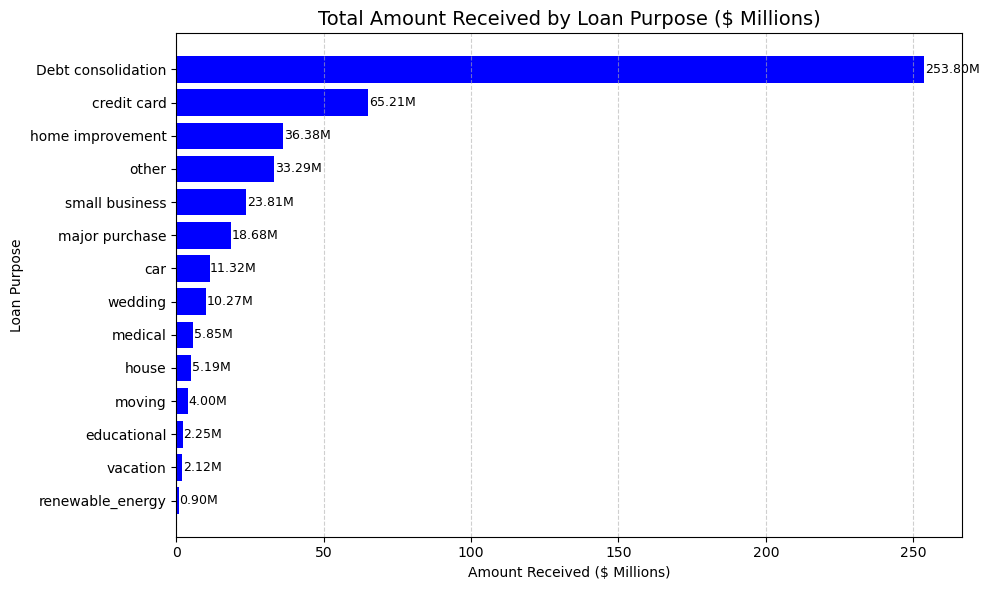

In [70]:
purpose_amt_millions = (df.groupby('purpose')['total_payment'].sum().sort_values()/1000000)

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_amt_millions.index, purpose_amt_millions.values, color='blue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y()+ bar.get_height()/2,
            f'{width:.2f}M', va='center', fontsize=9)

plt.title('Total Amount Received by Loan Purpose ($ Millions)', fontsize=14)
plt.xlabel('Amount Received ($ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### c. Loan Purpose by Total Loan Applications

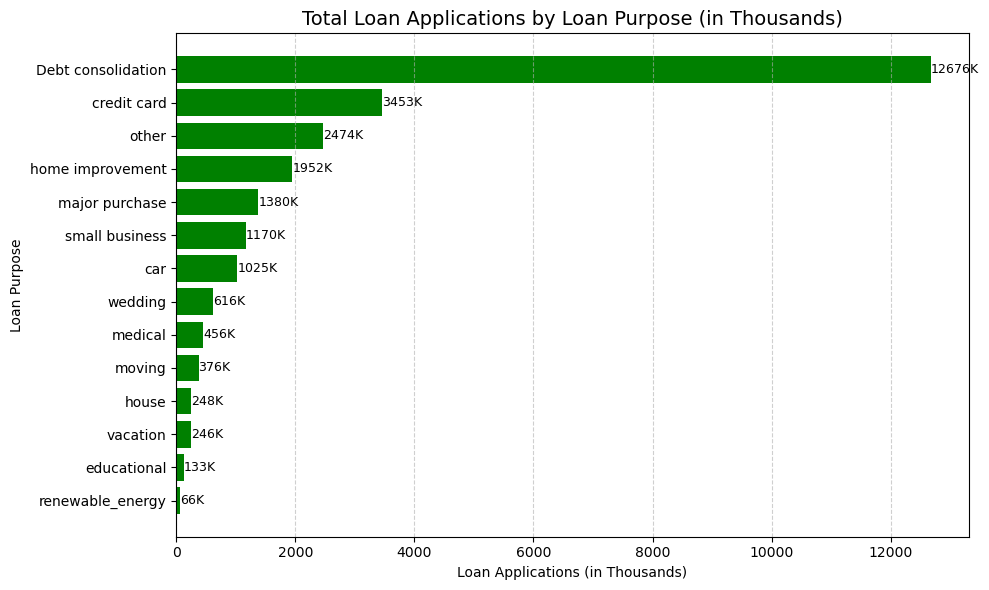

In [74]:
purpose_app_thousands = (df.groupby('purpose')['id'].sum().sort_values()/1000000)

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_app_thousands.index, purpose_app_thousands.values, color='green')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y()+ bar.get_height()/2,
            f'{width:.0f}K', va='center', fontsize=9)

plt.title('Total Loan Applications by Loan Purpose (in Thousands)', fontsize=14)
plt.xlabel('Loan Applications (in Thousands)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 6. Home-ownership Analysis

### a. Home-ownership by Total Funded Amount

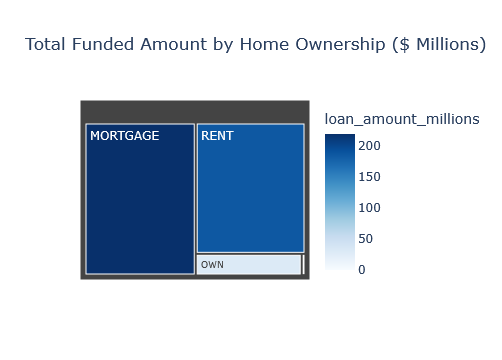

In [81]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount']/1000000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership ($ Millions)',
    hover_data={'loan_amount_millions': ':,.2f'}
)
fig.update_traces(
    hovertemplate='%{label}: $%{value:.2f}M<extra></extra>'
)

fig.show()

### b. Home Ownership by Total Amount Received

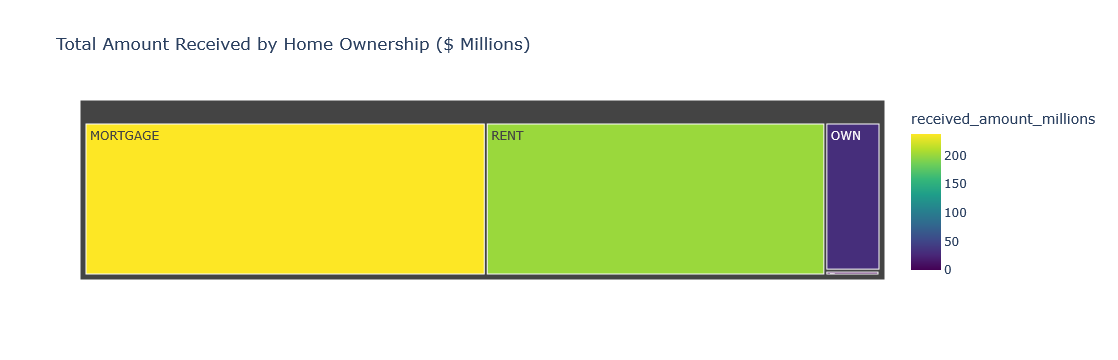

In [82]:
home_funding = df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_funding['received_amount_millions'] = home_funding['total_payment']/1000000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='received_amount_millions',
    color='received_amount_millions',
    color_continuous_scale='Viridis',
    title='Total Amount Received by Home Ownership ($ Millions)',
    hover_data={'received_amount_millions': ':,.2f'}
)
fig.update_traces(
    hovertemplate='%{label}: $%{value:.2f}M<extra></extra>'
)

fig.show()

### c. Home Ownership by Total Loan Applications

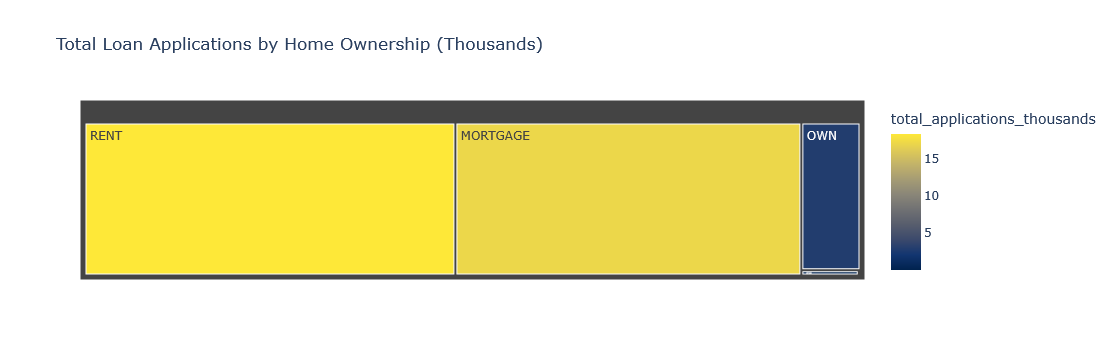

In [88]:
home_funding_app = df.groupby('home_ownership')['id'].count().reset_index()
home_funding_app['total_applications_thousands'] = home_funding_app['id']/1000

fig = px.treemap(
    home_funding_app,
    path=['home_ownership'],
    values='total_applications_thousands',
    color='total_applications_thousands',
    color_continuous_scale='Cividis',
    title='Total Loan Applications by Home Ownership (Thousands)',
    hover_data={'total_applications_thousands': ':,.2f'}
)
fig.update_traces(
    hovertemplate='%{label}: %{value:.0f}K<extra></extra>'
)

fig.show()